In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [43]:
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\mega_merged.csv', index_col=0)

In [44]:
data.head(20)

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med)
0,Total U.S.,2014,318386329,34038000,47055,0.106908,0.000148,0,0,0,0,0,0
1,Total U.S.,2015,320738994,35584000,52404,0.110944,0.000163,0,0,0,0,0,0
2,Total U.S.,2016,323071755,36806000,63450,0.113925,0.000196,0,0,0,0,0,0
3,Total U.S.,2017,325122128,39252000,70237,0.120730,0.000216,0,0,0,0,0,0
4,Total U.S.,2018,326838199,42211000,56144,0.129150,0.000172,0,0,0,0,0,0
5,Total U.S.,2019,328329953,45865000,70630,0.139692,0.000215,0,0,0,0,0,0
6,Total U.S.,2020,329484123,48938000,91799,0.148529,0.000279,0,0,0,0,0,0
7,North Dakota,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6
8,North Dakota,2015,755537,61000,61,0.080737,0.000081,0,0,1,2016,0,6
9,North Dakota,2016,756114,61000,77,0.080676,0.000102,0,0,1,2016,0,6


In [45]:
# Dropping first 7 rows being country summation.
data = data.iloc[7:]

In [46]:
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)

In [82]:
data.head(20)

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),kmeans_type
7,34,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6,0
8,34,2015,755537,61000,61,0.080737,0.000081,0,0,1,2016,0,6,0
9,34,2016,756114,61000,77,0.080676,0.000102,0,0,1,2016,0,6,0
10,34,2017,756755,68000,68,0.089857,0.000090,0,0,1,2016,0,6,0
11,34,2018,760062,74000,70,0.097360,0.000092,0,0,1,2016,0,6,0
12,34,2019,763724,78000,82,0.102131,0.000107,0,0,1,2016,0,6,0
13,34,2020,765309,92000,114,0.120213,0.000149,0,0,1,2016,0,6,0
14,27,2014,1879955,158000,125,0.084045,0.000066,0,0,0,0,0,0,0
15,27,2015,1892059,166000,126,0.087735,0.000067,0,0,0,0,0,0,0
16,27,2016,1906483,176000,120,0.092317,0.000063,0,0,0,0,0,0,0


In [48]:
data.describe()

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med)
count,347.000000,347.000000,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,25.126801,2016.971182,6.337552e+06,7.817291e+05,1301.783862,0.128158,0.000214,0.389049,785.011527,0.783862,1576.273775,1.645533,8.694524
std,14.732531,2.024212,7.061288e+06,9.226471e+05,1357.417491,0.038758,0.000101,0.488239,985.155112,0.412204,828.930359,2.837303,7.981847
min,0.000000,2014.000000,5.799940e+05,5.100000e+04,43.000000,0.070719,0.000045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.500000,2015.000000,1.768430e+06,2.130000e+05,333.500000,0.100326,0.000141,0.000000,0.000000,1.000000,1998.000000,0.000000,1.000000
50%,25.000000,2017.000000,4.472345e+06,4.970000e+05,835.000000,0.115944,0.000191,0.000000,0.000000,1.000000,2010.000000,0.000000,7.000000
75%,38.000000,2019.000000,7.360681e+06,9.910000e+05,1750.500000,0.146853,0.000265,1.000000,2016.000000,1.000000,2016.000000,2.000000,12.000000
max,50.000000,2020.000000,3.943761e+07,7.133000e+06,8908.000000,0.256679,0.000745,1.000000,2022.000000,1.000000,2022.000000,10.000000,26.000000


In [49]:
#Selecting X and y variables
y = data['Number of Opioid Deaths']
X = data.drop('Number of Opioid Deaths', axis = 1)
x = data[['Number of Cannabis Users']]
can = data['Number of Cannabis Users']
op = data['Number of Opioid Deaths']

In [50]:
#Creating a Simple Linear Regression Model to predict deaths
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [51]:
#Prediction of deaths by the model
yp=lm.predict(x)
print(yp)

[ 397.42918633  396.17266541  396.17266541  404.96831182  412.5074373
  417.53352096  435.12481377  518.05519413  528.10736145  540.6725706
  545.69865425  570.82907255  604.75513724  595.95949084  397.42918633
  413.76395822  423.81612554  428.84220919  427.58568828  420.04656279
  438.89437651  634.91163919  614.80730456  638.68120194  693.96812218
  729.15070779  730.4072287   808.31152541 2886.5971182  3100.20567369
 3164.28824033 3330.14900106 3534.96191015 3915.68774728 4072.75286161
 1014.38095541 1047.05049919 1063.38527108 1117.41567041 1300.86772394
 1294.58511937 1439.08502455 1319.71553766 1284.53295205 1354.89812327
 1376.25897882 1407.67200169 1524.52844675  607.26817907  585.90732352
  609.7812209   670.0942248   676.37682938  692.71160127  739.20287511
 1529.55453041 1641.38489181 1636.35880815 1567.25015784 1965.56728778
 1836.14563357  500.46390133  504.23346407  509.25954773  510.51606864
  526.85084053  548.21169608  539.41604968 6140.98628708 6521.71212421
 6974.05

In [84]:
len(yp)

347

In [52]:
from bokeh.plotting import figure, show, output_file
p=figure(title="Actual vs Predicted Deaths", width=450, height=300)
p.title.align = 'center'
p.circle(can, op)
p.line(can, op, legend_label='Actual Deaths', line_width=3, line_alpha=0.4)
p.circle(can, yp, color="red")
p.line(can,yp, color="red",legend_label='Predicted Deaths', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'Cannabis_use'
p.yaxis.axis_label = 'Opioid_deaths'
show(p)

In [53]:
print(f'Residuals: {y-yp}')
np.sqrt(np.mean(np.square(y-yp)))  #RMSE

Residuals: 7     -354.429186
8     -335.172665
9     -319.172665
10    -336.968312
11    -342.507437
          ...    
349   -262.811620
350   -265.559415
351   -293.946354
352   -356.228959
353   -240.950670
Name: Number of Opioid Deaths, Length: 347, dtype: float64


705.060509863546

In [54]:
np.mean(abs(y-yp))                 #MAE

464.62218061055864

In [55]:
#RMSE/MAE computation using sklearn library
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y, yp))


705.060509863546

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(x) 
lm.fit(X_poly, y)
yp=lm.predict(X_poly)

In [58]:
#RMSE and MAE
np.sqrt(np.mean(np.square(y-yp)))


627.2225800767235

In [59]:
np.mean(abs(y-yp))

388.0194066768442

In [60]:
from bokeh.plotting import figure, show, output_file
p=figure(title="Actual vs Predicted Deaths", width=450, height=300)
p.title.align = 'center'
p.circle(can, op)
p.line(can, op, legend_label='Actual Deaths', line_width=3, line_alpha=0.4)
p.circle(can, yp, color="red")
p.line(can,yp, color="red",legend_label='Predicted Deaths', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'Cannabis_use'
p.yaxis.axis_label = 'Opioid_deaths'
show(p)

In [61]:
print(y-yp)   #residuals

7      -72.322981
8      -52.387912
9      -36.387912
10     -58.927061
11     -68.520281
          ...    
349   -117.746865
350   -143.625832
351   -184.608913
352   -249.870991
353   -154.653126
Name: Number of Opioid Deaths, Length: 347, dtype: float64


C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


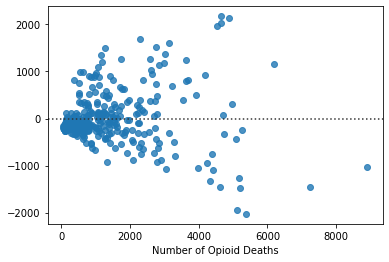

In [62]:
import seaborn as sns
sns.residplot(y, yp)  
plt.show()

In [63]:
#Feature Selection 
y=data['Number of Opioid Deaths'].values
X=data[['State','Year','Population','Number of Cannabis Users','Per Capita Cannabis Use','Per Capita Opioid Deaths','Recreational','Rec Year Legalized','Medical','Med Year Legalized','Years legal (rec)','Years legal (med)']]
#Split data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [64]:
#Scaling numeric features using sklearn StandardScalar
numeric=['State','Year','Population','Number of Cannabis Users','Per Capita Cannabis Use','Per Capita Opioid Deaths','Recreational','Rec Year Legalized','Medical','Med Year Legalized','Years legal (rec)','Years legal (med)']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [65]:
# Standard Linreg model

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))




(0.8758071619495469, 403.4730556934286, 632.7367784134655)

In [66]:
# DecisionTreeReg model

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


(0.8230483476793544, 344.48571428571427, 755.269790964035)

In [67]:
# Imporoved MAE, Moderate decrease in accuracy for RMSE score

In [68]:
#Feature Engineering

In [69]:
from sklearn.cluster import KMeans
features=['State','Year','Population','Number of Cannabis Users','Per Capita Cannabis Use','Per Capita Opioid Deaths','Recreational','Rec Year Legalized','Medical','Med Year Legalized','Years legal (rec)','Years legal (med)']
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[features])
data['kmeans_type'] = kmeans.predict(data[features])
data

,State,Year,Population,Number of Cannabis Users,Number of Opioid Deaths,Per Capita Cannabis Use,Per Capita Opioid Deaths,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),kmeans_type
7,34,2014,738736,62000,43,0.083927,0.000058,0,0,1,2016,0,6,0
8,34,2015,755537,61000,61,0.080737,0.000081,0,0,1,2016,0,6,0
9,34,2016,756114,61000,77,0.080676,0.000102,0,0,1,2016,0,6,0
10,34,2017,756755,68000,68,0.089857,0.000090,0,0,1,2016,0,6,0
11,34,2018,760062,74000,70,0.097360,0.000092,0,0,1,2016,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,3,2016,2991815,274000,401,0.091583,0.000134,0,0,1,2016,0,6,0
350,3,2017,3003855,312000,446,0.103867,0.000148,0,0,1,2016,0,6,0
351,3,2018,3012161,333000,444,0.110552,0.000147,0,0,1,2016,0,6,0
352,3,2019,3020985,338000,388,0.111884,0.000128,0,0,1,2016,0,6,0


In [70]:
data.kmeans_type.nunique()

2

In [71]:
# DecisionTreeRegressor with TargetRegressor
X=data[['State','Year','Population','Number of Cannabis Users','Per Capita Cannabis Use','Per Capita Opioid Deaths','Recreational','Rec Year Legalized','Medical','Med Year Legalized','Years legal (rec)','Years legal (med)']]
# Split test and train data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)
round(r2_score(y_test, yhat), 3), round(mean_absolute_error(y_test, yhat), 2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


(0.838, 295.24, 723.17)

In [72]:
# DecisionTreeRegressor with TargetRegressor delivers slightly better scores
# than plain DecisionTreeRegressor.

In [73]:
# RandomForestRegressor with TargetRegressor
model = RandomForestRegressor()
# transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train, y_train)
yhat = ttr.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


(0.8794752030528519, 217.70231766516105, 623.322792092214)

In [74]:
# RandomForestRegressor with TargetRegressor delivers better scores than 
# DecisionTreeRegressor with TargetRegressor.

In [75]:
len(X_train)

277

In [76]:
len(y_train)

277

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.886,205.81,605.84
1,XGBRFRegressor,0.870,247.89,647.33


In [36]:
GradientBoostingRegressor()
regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


TypeError: Cannot clone object '     Number of Cannabis Users
7                       62000
8                       61000
9                       61000
10                      68000
11                      74000
..                        ...
349                    274000
350                    312000
351                    333000
352                    338000
353                    372000

[347 rows x 1 columns]' (type <class 'pandas.core.frame.DataFrame'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [78]:
# Gridsearch from Sklearn automates optimizing parameter values. 

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [ 100, 80, 60, 55, 51, 45, 30],  
              'max_depth': [3, 5, 7],
              'reg_lambda' :[0.4, 0.26, 0.25]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


Fitting 5 folds for each of 63 candidates, totalling 315 fits
{'max_depth': 7, 'n_estimators': 30, 'reg_lambda': 0.25}


C:\Users\John\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (277). n_quantiles is set to n_samples.
  warnings.warn(


(0.8671905489397669, 238.6873658316476, 654.3186421683181)

In [80]:
yhat

array([ 562.373   , 4655.9336  ,  761.1314  , 1559.655   ,  565.2337  ,
       1730.8265  ,  217.44447 , 2570.7654  , 1425.3315  ,  160.84474 ,
       1057.6166  , 2172.387   ,  205.54482 , 4468.4214  , 2707.8499  ,
        856.11743 , 4199.56    , 1099.1849  , 1477.7007  , 2729.803   ,
       1106.4972  , 1409.318   , 5106.3276  , 4427.5073  , 2971.9087  ,
        391.07217 ,  378.99777 ,  192.95924 ,  350.91284 ,  677.7379  ,
       3583.57    ,  761.5411  ,  326.16812 ,   69.32255 ,  395.0743  ,
       1486.9158  , 1172.616   , 2737.2065  , 1164.6776  ,  688.7811  ,
        834.9093  , 3577.1333  , 3006.8914  ,   77.43751 ,  278.67813 ,
        771.5253  , 1526.9641  ,  125.14093 , 4593.4375  ,  583.01733 ,
        721.60693 ,   75.733986,  126.25539 , 1598.0884  ,  327.57397 ,
        399.55435 , 1503.2903  ,  797.41064 , 4636.1714  , 4654.7124  ,
        126.25539 , 3002.3872  ,  160.84474 ,  352.1612  , 1072.1396  ,
        674.9484  , 2009.6898  , 2135.6333  , 1166.4095  ,  646.

In [81]:
p=figure(title="Actual vs Predicted Deaths", width=450, height=300)
p.title.align = 'center'
p.circle(can, op)
p.line(can, op, legend_label='Actual Deaths', line_width=3, line_alpha=0.4)
p.circle(can, yhat, color="red")
p.line(can, yhat, color="red",legend_label='Predicted Deaths', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'Cannabis_use'
p.yaxis.axis_label = 'Opioid_deaths'
show(p)

In [ ]:
# Ultimately our best scores rival eachother with GradientBoostingRegressor 
# scores of R2: 0.886, MAE: 207.18, RMSE: 607.33

# and RandomForestRegressor with TargetRegressor scores of 
# R2: 0.8785465757989548, MAE: 216.12271845694906, RMSE: 625.7194932758786